In [1]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2001

In [3]:
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD()

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [4]:
def train():
    for i in range(max_iterations):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for key in weight_init_types.keys():
            grads = networks[key].gradient(x_batch, t_batch)
            optimizer.update(networks[key].params, grads)

            loss = networks[key].loss(x_batch, t_batch)
            train_loss[key].append(loss)

        if i % 100 == 0:
            print("===========" + "iteration:" + str(i) + "===========")
            for key in weight_init_types.keys():
                loss = networks[key].loss(x_batch, t_batch)
                print(key + ": " + str(loss))

In [5]:
def plot_graph():
    markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
    x = np.arange(max_iterations)
    for key in weight_init_types.keys():
        plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.ylim(0, 2.5)
    plt.legend()
    plt.show()

In [6]:
train()

===========iteration:0===========
std=0.01: 2.3024182861018954
Xavier: 2.307842133401925
He: 2.2874276568572722
===========iteration:100===========
std=0.01: 2.3021891410170015
Xavier: 2.1981166048649174
He: 1.394478488227294
===========iteration:200===========
std=0.01: 2.3028746688176533
Xavier: 2.045545743438279
He: 0.8027521308224013
===========iteration:300===========
std=0.01: 2.303210991621924
Xavier: 1.6816867609214
He: 0.4831972453791262
===========iteration:400===========
std=0.01: 2.3013400587968853
Xavier: 1.1413965760372755
He: 0.4581805667535709
===========iteration:500===========
std=0.01: 2.300913195071696
Xavier: 0.8668093273101422
He: 0.3542378497424704
===========iteration:600===========
std=0.01: 2.301032484595846
Xavier: 0.7595169688637842
He: 0.41677464708022705
===========iteration:700===========
std=0.01: 2.299243835441758
Xavier: 0.7136575682380065
He: 0.4063485428727812
===========iteration:800===========
std=0.01: 2.3044235621773126
Xavier: 0.5125500387083239

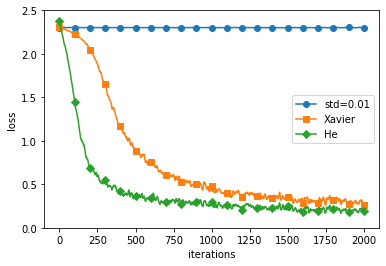

In [7]:
plot_graph()